In [21]:
%matplotlib inline
import numpy
from pylab import *

# Data files

These data files were generated like so (with either `--dna` or `--protein`)

```
for k in 15 18 21 30;
do
../sourmash search ecoliMG1655.fa.sig *.sig -k $k --dna \
        --csv ecoli.k$k.dna.csv --threshold=0.001;
done
```

and the files are available if you like.  The .sig files were generated from genomes found by similarity search with E. coli mg1655 with DNA search at a k-mer size of 21.

In [22]:
ls *.csv

ecoli.k15.dna.csv   ecoli.k18.dna.csv   ecoli.k21.dna.csv   ecoli.k30.dna.csv
ecoli.k15.prot.csv  ecoli.k18.prot.csv  ecoli.k21.prot.csv  ecoli.k30.prot.csv


In [23]:
fieldnames = ['similarity_qa', 'similarity_aq', 'name', 'filename']

In [24]:
import csv

In [25]:
r = csv.DictReader(open('ecoli.k21.prot.csv', 'r'))
protk21 = dict([ (d['name'], float(d['similarity_aq'])) for d in r ])

r = csv.DictReader(open('ecoli.k30.prot.csv', 'r'))
protk30 = dict([ (d['name'], float(d['similarity_aq'])) for d in r ])

r = csv.DictReader(open('ecoli.k15.prot.csv', 'r'))
protk15 = dict([ (d['name'], float(d['similarity_aq'])) for d in r ])

r = csv.DictReader(open('ecoli.k18.prot.csv', 'r'))
protk18 = dict([ (d['name'], float(d['similarity_aq'])) for d in r ])

In [26]:
r = csv.DictReader(open('ecoli.k21.dna.csv', 'r'))
dnak21 = dict([ (d['name'], float(d['similarity_aq'])) for d in r ])

r = csv.DictReader(open('ecoli.k30.dna.csv', 'r'))
dnak30 = dict([ (d['name'], float(d['similarity_aq'])) for d in r ])

r = csv.DictReader(open('ecoli.k15.dna.csv', 'r'))
dnak15 = dict([ (d['name'], float(d['similarity_aq'])) for d in r ])

r = csv.DictReader(open('ecoli.k18.dna.csv', 'r'))
dnak18 = dict([ (d['name'], float(d['similarity_aq'])) for d in r ])

In [27]:
x = []
for name in protk21:
    r = []
    r.append(protk21[name])
    r.append(dnak21[name])
    r.append(protk30.get(name, 0))
    r.append(dnak30.get(name, 0))
    r.append(protk15.get(name, 0))
    r.append(dnak15.get(name, 0))
    r.append(protk18.get(name, 0))
    r.append(dnak18.get(name, 0))
    x.append(r)
x = numpy.array(x)

## Comparing DNA similarity to protein similarity

On the graph below, each point is the protein similarity between the given genome and E. coli MG1655 (x), _or_ the DNA similarity between that genome and E. coli (y).

Conclusion: protein matching is always more similar than DNA matching, for the same k-mer size.

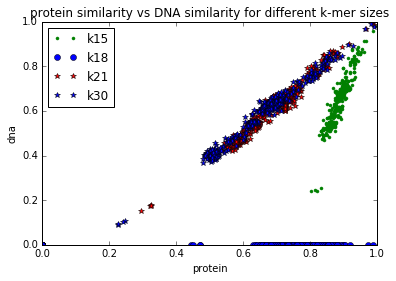

In [28]:
plot(x[:,4], x[:,5], 'g.', label='k15')
plot(x[:,6], x[:,7], 'o', label='k18')
plot(x[:,0], x[:,1], 'r*', label='k21')
plot(x[:,2], x[:,3], 'b*', label='k30')

axis(xmin=0, ymin=0)
xlabel('protein')
ylabel('dna')
title('protein similarity vs DNA similarity for different k-mer sizes')
legend(loc='upper left')

## Protein at k=21 vs protein at other k-mer sizes

As expected, k18 and k15 have less stringency. k=21 and k=30 seem to more or less match
(the red dots form a straight line).

I was a little surprised that all the lines are straight, but I got over it.

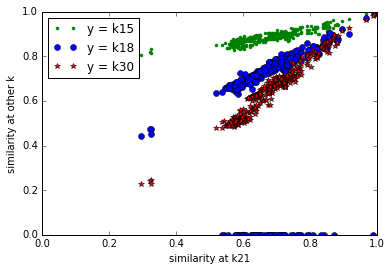

In [29]:
plot(x[:,0], x[:,4], 'g.', label='y = k15')
plot(x[:,0], x[:,6], 'bo', label='y = k18')
plot(x[:,0], x[:,2], 'r*', label='y = k30')


axis(xmin=0, ymin=0)
ylabel('similarity at other k')
xlabel('similarity at k21')
legend(loc='upper left')

## Results from random genome

Random genome (5e6 bases) against E. coli, in protein space. This gives us background similarities where we shouldn't trust matches.

```
% ../sourmash search --protein -k 21 random5e6.fa.sig ecoliMG1655.fa.sig  --threshold=0.001
# running sourmash subcommand: search
loading db of signatures from 1 files
loaded 1 signatures total.
1 matches; showing 3:
         ../ecoliMG1655.fa       0.022   ecoliMG1655.fa.sig

% ../sourmash search --protein -k 18 random5e6.fa.sig ecoliMG1655.fa.sig  --threshold=0.001
# running sourmash subcommand: search
loading db of signatures from 1 files
loaded 1 signatures total.
1 matches; showing 3:
         ../ecoliMG1655.fa       0.202   ecoliMG1655.fa.sig


% ../sourmash search --protein -k 15 random5e6.fa.sig ecoliMG1655.fa.sig  --threshold=0.001
# running sourmash subcommand: search
loading db of signatures from 1 files
loaded 1 signatures total.
1 matches; showing 3:
         ../ecoliMG1655.fa       0.698   ecoliMG1655.fa.sig
```

## Results from random genome, omitting stop codons

Below, I omit any k-mers that have a stop codon in them.

TODO

## E. coli protein sequences against E. coli genome

Here the genome sequence is translated in all six reading frames, and the FAA sequence is taken directly:

```
./sourmash compute --input-is-protein -k 18,21 GCF_000005845.2_ASM584v2_protein.faa.gz --name mg1655-faa -o mg1655-faa.sig --protein -f
```

```
./sourmash search mg1655-faa.sig --protein -k 21 prot-many/ecoliMG1655.fa.sig 
# running sourmash subcommand: search
loading db of signatures from 1 files
loaded 1 signatures total.
1 matches; showing 3:
         ../ecoliMG1655.fa       0.164   prot-many/ecoliMG1655.fa.sig
         
./sourmash search mg1655-faa.sig --protein -k 18 prot-many/ecoliMG1655.fa.sig 
# running sourmash subcommand: search
loading db of signatures from 1 files
loaded 1 signatures total.
1 matches; showing 3:
         ../ecoliMG1655.fa       0.148   prot-many/ecoliMG1655.fa.sig
```

## E. coli protein sequences against E. coli genome, omitting stop codons

Below, I omit any k-mers that have a stop codon in them. This gives better (stronger) matches.

```
./sourmash search mg1655-faa.sig --protein -k 18 prot-many/ecoliMG1655.fa.sig 
# running sourmash subcommand: search
loading db of signatures from 1 files
loaded 1 signatures total.
1 matches; showing 3:
         ../ecoliMG1655.fa       0.198   prot-many/ecoliMG1655.fa.sig
         
% ./sourmash search mg1655-faa.sig --protein -k 21 prot-many/ecoliMG1655.fa.sig 
# running sourmash subcommand: search
loading db of signatures from 1 files
loaded 1 signatures total.
1 matches; showing 3:
         ../ecoliMG1655.fa       0.210   prot-many/ecoliMG1655.fa.sig
```